# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import json
import requests 

# Building URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Lists to hold reponse info

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

city_list = []

counter = 0
sets = 1
max_calls = 50

print('Beginning Data Retrieval')
print('-----------------------------')
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_list.append(city)
        
        counter += 1
        
        # Set up the max_calls limit with a sets counter
        if counter == max_calls:
            sets += 1
            counter = 1
        
        print(f"Processing Record {counter} of Set {sets} | {city}")
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print('-----------------------------')
print('Data Retrieval Complete')    
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | hobart
City not found. Skipping...
Processing Record 5 of Set 1 | lorengau
City not found. Skipping...
Processing Record 6 of Set 1 | arlit
Processing Record 7 of Set 1 | casino
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | soe
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | juli
Processing Record 14 of Set 1 | wukari
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | mitu
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | buta
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | ciudad bolivar
Processing Record 21 of Set 1 | hermanus
City not found. Sk

Processing Record 39 of Set 4 | halifax
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 4 | aitape
Processing Record 41 of Set 4 | zverinogolovskoye
City not found. Skipping...
City not found. Skipping...
Processing Record 42 of Set 4 | new norfolk
Processing Record 43 of Set 4 | port blair
Processing Record 44 of Set 4 | port hawkesbury
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | yar-sale
Processing Record 47 of Set 4 | huilong
Processing Record 48 of Set 4 | batagay-alyta
City not found. Skipping...
Processing Record 49 of Set 4 | amaraji
Processing Record 1 of Set 5 | lagunas
Processing Record 2 of Set 5 | mikhaylovka
Processing Record 3 of Set 5 | bontang
Processing Record 4 of Set 5 | valparaiso
Processing Record 5 of Set 5 | sergeyevka
Processing Record 6 of Set 5 | hofn
Processing Record 7 of Set 5 | kahului
Processing Record 8 of Set 5 | itoman
Processing Record 9 of Set 5 | ust-ilimsk
City not found. Skipping...
Pr

Processing Record 27 of Set 8 | fukue
City not found. Skipping...
Processing Record 28 of Set 8 | puerto baquerizo moreno
Processing Record 29 of Set 8 | lazurne
Processing Record 30 of Set 8 | adelaide
Processing Record 31 of Set 8 | charters towers
Processing Record 32 of Set 8 | caldas da rainha
Processing Record 33 of Set 8 | teruel
Processing Record 34 of Set 8 | watsa
City not found. Skipping...
Processing Record 35 of Set 8 | portland
Processing Record 36 of Set 8 | venice
Processing Record 37 of Set 8 | kumluca
Processing Record 38 of Set 8 | obera
Processing Record 39 of Set 8 | rawson
Processing Record 40 of Set 8 | anori
Processing Record 41 of Set 8 | boralday
Processing Record 42 of Set 8 | biskamzha
Processing Record 43 of Set 8 | machali
Processing Record 44 of Set 8 | saint-augustin
Processing Record 45 of Set 8 | khani
Processing Record 46 of Set 8 | thinadhoo
Processing Record 47 of Set 8 | khalkhal
Processing Record 48 of Set 8 | pontes e lacerda
Processing Record 49

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create DataFrame
city_df = pd.DataFrame({
    'City': city_list,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date,
    })

# Export the city data into a .csv.
city_df.to_csv('output_data/output_data_cities.csv')

city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-philippe,-21.36,55.77,73.40,88,75,17.22,RE,1607901636
1,faanui,-16.48,-151.75,80.20,73,3,11.52,PF,1607901470
2,bethel,41.37,-73.41,51.80,53,1,5.82,US,1607901637
3,hobart,-42.88,147.33,78.01,43,0,14.99,AU,1607901618
4,lorengau,-2.02,147.27,83.88,78,83,12.68,PG,1607901637
...,...,...,...,...,...,...,...,...,...
547,west bay,19.37,-81.42,80.60,83,20,9.17,KY,1607901728
548,moron,-34.65,-58.62,75.00,72,20,5.99,AR,1607901728
549,mundgod,14.97,75.03,64.13,68,0,5.73,IN,1607901728
550,krasnoborsk,61.56,45.93,15.89,93,28,6.02,RU,1607901728


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_df.sort_values(by=['Humidity'], ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
471,store heddinge,55.31,12.39,41.00,100,90,5.82,DK,1607901714
176,bereda,43.27,-7.54,55.99,100,99,8.99,ES,1607901665
190,port hawkesbury,45.62,-61.35,39.99,100,90,5.82,CA,1607901595
185,halifax,44.65,-63.57,48.99,100,87,4.70,CA,1607901416
487,half moon bay,37.46,-122.43,59.00,100,90,3.36,US,1607901717
...,...,...,...,...,...,...,...,...,...
508,mayahi,13.96,7.67,75.90,18,0,9.01,NE,1607901721
363,bakel,14.90,-12.46,79.81,17,99,9.04,SN,1607901696
385,machali,-34.18,-70.67,84.20,16,0,8.37,CL,1607901700
5,arlit,18.74,7.39,73.35,15,0,7.61,NE,1607901637


In [7]:
#  Get the indices of cities that have humidity over 100%.
 
    # This section was skiped because no cities that have humidity > 100%.

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

    # This section was skiped because no cities that have humidity > 100%.

This section was skiped because no cities that have humidity > 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

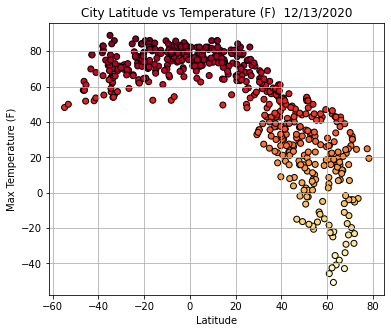

In [9]:
# Create a scatter plot for latitude vs max temperature.
x_values = city_df['Lat']
y_values = city_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(6,5))
plt.scatter(x_values, y_values, c=y_values, cmap='YlOrRd', edgecolors = "k", linewidths = 1,)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Temperature (F)  {time.strftime("%m/%d/%Y")}')
plt.grid()
plt.savefig("Images/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

The above Latitute vs Temperute scatter plot comparing the max temperature for each city accross different latitudes shows the correlation that as we move away from the equator (Latitude 0) the temperature drops. However, there is not much of a drop moving south of the equator from 0 degrees latitude to around -60 degrees latitude.

## Latitude vs. Humidity Plot

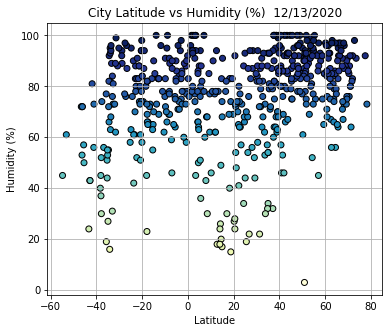

In [10]:
# Create a scatter plot for latitude vs humidity.
x_values = city_df['Lat']
y_values = city_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(6,5))
plt.scatter(x_values, y_values,c=y_values, cmap='YlGnBu', edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity (%)  {time.strftime("%m/%d/%Y")}')
plt.grid()
plt.savefig("Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

The above Latitute vs Humidity scatter plot shows that there is not a strong correlation between latitude and Humidity levels. 

## Latitude vs. Cloudiness Plot

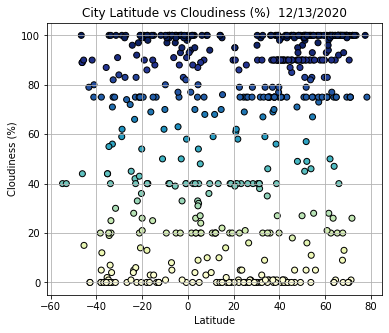

In [11]:
# Create a scatter plot for latitude vs humidity.
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(6,5))
plt.scatter(x_values, y_values,c=y_values, cmap='YlGnBu', edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness (%)  {time.strftime("%m/%d/%Y")}')
plt.grid()
plt.savefig("Images/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The above Latitute vs Cloudiness scatter plot shows that there is not a strong correlation between latitude and cloudiness, but rather demonstrate the consistency of cloudiness percentage at certain values, notably 0%, 20%, 40%, 75%, and 100%.

## Latitude vs. Wind Speed Plot

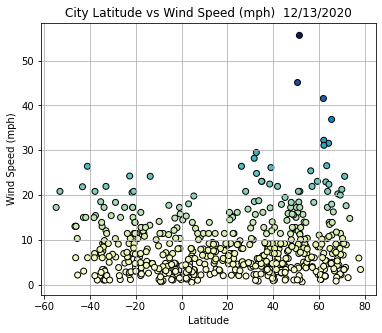

In [12]:
# Create a scatter plot for latitude vs humidity.
x_values = city_df['Lat']
y_values = city_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(6,5))
plt.scatter(x_values, y_values,c=y_values, cmap='YlGnBu', edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed (mph)  {time.strftime("%m/%d/%Y")}')
plt.grid()
plt.savefig("Images/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The above Latitute vs Wind Speed scatter plot shows little to no correlation between latitude and wind spped. However, the plot shows that it seems rare for wind speeds to rise above 20 mph.

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_df.loc[city_df['Lat'] >= 0]
southern_df = city_df.loc[city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8153788311424165
The correlation between both factors is -0.82


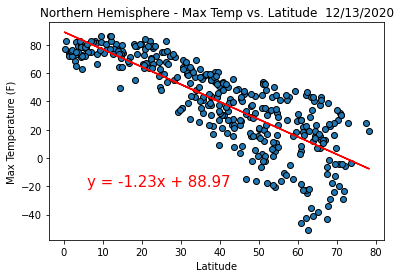

In [21]:
# Create a scatter plot for Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature (F)')
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/northern_max_temp_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a strong, negative correlation between Maximum temperature and latitude with a high correlation coefficient (value shown in the graph). These means that farther away from the equater(latitude 0) the maximum Temperature (F) will decrease. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4831275151653499
The correlation between both factors is 0.48


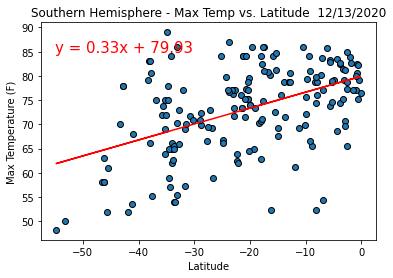

In [26]:
# Create a scatter plot for Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature (F)')
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/southern_max_temp_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a lower correlation between Maximum Temperature and latitude in the Southern Hemisphere compare to the Northern Hemisphere. Less that 50% of the data fit the model and the correlation coefficient (value shown in the graph)is low.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3122517372721663
The correlation between both factors is 0.31


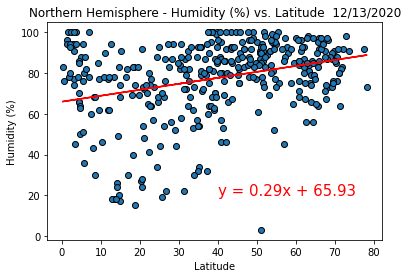

In [35]:
# Create a scatter plot for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Humidity (%)')
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/northern_humidity_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a low correlation between humidity and latitude in the Northern hemisphere. the data is very wide distributed and the values of r-quare and correlation coefficient (values shown in the graph) support that the model is very poor.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36545153292114313
The correlation between both factors is 0.37


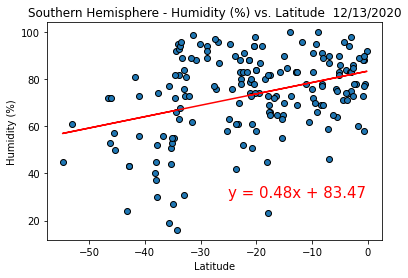

In [36]:
# Create a scatter plot for Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Humidity (%)')
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/southern_humidity_vs_lat_lin_regression.png')
plt.show()

The result from the data showed the same conclusions as the Northern hemisphere (above) for the Southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3223515540827194
The correlation between both factors is 0.32


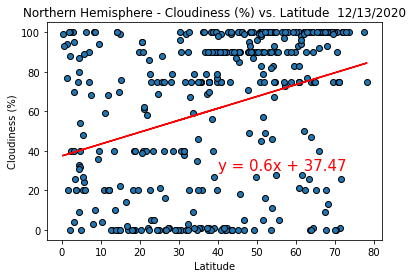

In [38]:
# Create a scatter plot for Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness (%)')
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/northern_cloudiness_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a low correlation between cloudiness and latitude in the Northern hemisphere. the data is very wide distributed and the values of r-quare and correlation coefficient (values shown in the graph) support that the model is very poor.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.26547305628775963
The correlation between both factors is 0.27


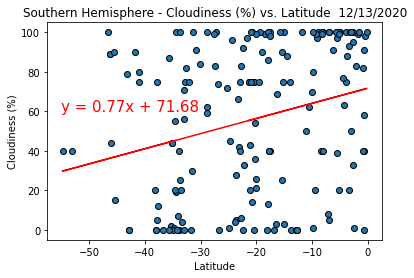

In [39]:
# Create a scatter plot for Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness (%)')
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/southern_cloudiness_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a low correlation between cloudiness and latitude in the Southern hemisphere. the data is very wide distributed and the values of r-quare and correlation coefficient (values shown in the graph) support that the model is very poor.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18403076941549285
The correlation between both factors is 0.18


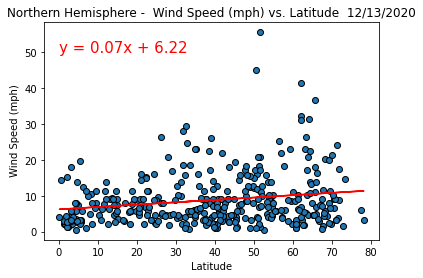

In [40]:
# Create a scatter plot for Northern Hemisphere -  Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f' Wind Speed (mph)')
plt.title(f'Northern Hemisphere -  Wind Speed (mph) vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/northern_wind_speed_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a low correlation between  wind speed and latitude in the Northern hemisphere. the data is very wide distributed and the values of r-quare and correlation coefficient (values shown in the graph) support that the model is very poor.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2584211450759492
The correlation between both factors is -0.26


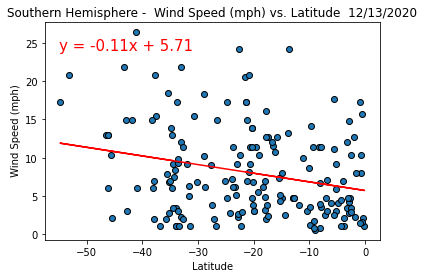

In [42]:
# Create a scatter plot for Southern Hemisphere -  Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,24),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f' Wind Speed (mph)')
plt.title(f'Southern Hemisphere -  Wind Speed (mph) vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/southern_wind_speed_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a low correlation between wind speed and latitude in the Southern hemisphere. the data is very wide distributed and the values of r-quare and correlation coefficient (values shown in the graph) support that the model is very poor.